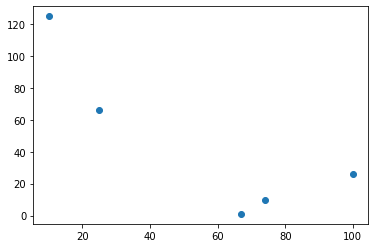

In [1]:
import matplotlib.pyplot as plt

xs = [10, 100, 25, 67, 74]
ys = [125, 26, 66, 1, 10]

plt.scatter(xs,ys) #the plot scatter required two variables for and (X,Y) coordinates

[[ 10 125]
 [100  26]
 [ 25  66]
 [ 67   1]
 [ 74  10]]
[ 10 100  25  67  74]
[125  26  66   1  10]


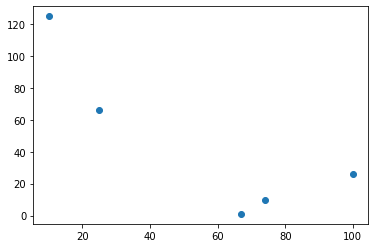

In [105]:
import numpy as np  #numpy data structures
import matplotlib.pyplot as plt

xs = [10, 100, 25, 67, 74]
ys = [125, 26, 66, 1, 10]

xys = [[10,125],[100,26],[25,66],[67,1],[74,10]]
xys = np.array(xys) #convert it into numpy array

print(xys) 

#plt.scatter(xys)  this throws an error because we need two variables for the scatter plot

print(xys[:,0]) #prints first column
print(xys[:,1]) #prints second column

plt.scatter(xys[:,0], xys[:,1]) #plt.scatter needs x,y coordinates. In our case X = 1st column, Y = 2nd column

In [3]:
np.mean(xys) #this prints the mean of all values

50.4

## Find the mean

In [4]:
#1
x_mean = np.mean(xys[:,0])
y_mean = np.mean(xys[:,1])

print(x_mean, y_mean)

55.2 45.6


In [8]:
#2
 
mean = np.mean(xys)                #if we don't input any parameter, np.mean flattens all the datapoints out & calc the mean
mean_x = np.mean(xys, 0)           #if we include 0 - column wise mean
mean_y = np.mean(xys, 1)           #if we include 1 - row wise mean

print(mean_x)
print(mean_y)


[55.2 45.6]
[67.5 63.  45.5 34.  42. ]


## Graphical Overalys

One can visualise multiple functions on a graph through the technique of graphical overlaying, which uses a function called subplot. Subplot throws two variables, fig and graph, and the latter allows us to call multiple functions on it. 

Also, when drawing an Ellipse, one must include the (x,y) coordinates, the width and height of the shape (in our case, defined by the standard deviation)

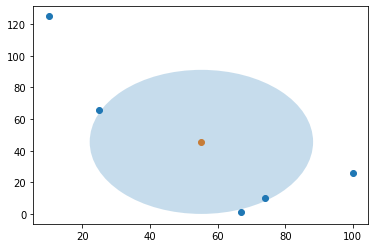

In [12]:
import matplotlib.patches as patches #used to draw the elipse

mean = np.mean(xys,0)   #column wise mean-retuns array [55.2, 45.6], mean for each var
std_dev = np.std(xys,0)  #standard deviation, column wise (returns 2 values)


#Ellipse needs the (x, y) coordinates (as a [] list), width, height 
ellipse = patches.Ellipse([mean[0], mean[1]], std_dev[0]*2, std_dev[1]*2, alpha=0.25) 


#enable the creation of multiple graphs on a plot, using:
fig, graph = plt.subplots()


#we then draw functions on the subplot, which is called graph. 
#subplot, throws two variables, fig and graph - interested in the 2nd one
#because it allows us to draw multiple functions on it

#we draw the plots below on the graph and not on plt, hence the method: 
graph.scatter(xys[:,0], xys[:,1])    #X,Y coordinates, 1st & 2nd column
graph.scatter(mean[0], mean[1])      #scatter the column wise mean(55.2,45.6)

graph.add_patch(ellipse)


## Normalisation of Data

On a (0,1) scale, one uses the following formula:
__x_normalised = (x - x_min)/(x_max - x_min)__

In [20]:
xys_2 = xys[:]   #slice

data_min = np.min(xys, 0) #did it column-wise across the data
data_max = np.max(xys, 0)
print('The min is:',data_min,'and the max is: ', x_max,'\n')

normed = (xys - data_min) / (data_max - data_min)

print('The normalised data for', xys_2, '\n','is ', '\n',normed)

#max becomes 1, min becomes 0

The min is: [10  1] and the max is:  100 

The normalised data for [[ 10 125]
 [100  26]
 [ 25  66]
 [ 67   1]
 [ 74  10]] 
 is  
 [[0.         1.        ]
 [1.         0.2016129 ]
 [0.16666667 0.52419355]
 [0.63333333 0.        ]
 [0.71111111 0.07258065]]


## Graphical Overlays - normalised data

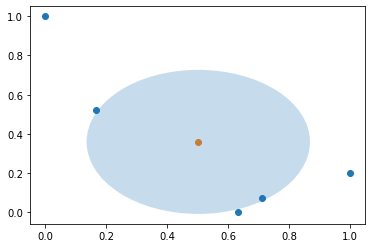

In [25]:
mean= np.mean(normed,0)   #used the normed data
std_dev = np.std(normed,0)  #used the normed data

ellipse = patches.Ellipse([mean[0], mean[1]], std_dev[0]*2, std_dev[1]*2, alpha=0.25) 

fig, graph = plt.subplots()


#we then draw functions on the subplot, which is called graph. 
#subplot, throws two variables, fig and graph - interested in the 2nd one
#because it allows us to draw multiple functions on it


#we draw the plots below on the graph and not on plt, hence the method: 
graph.scatter(normed[:,0], normed[:,1])    #X,Y coordinates, 1st & 2nd column
graph.scatter(mean[0], mean[1])      #scatter the column wise mean(55.2,45.6)

graph.add_patch(ellipse)


## Using the Pandas Library to Read csv Files

In [66]:
import pandas as pd    #pandas dataframes

data = pd.read_csv('happyscores_income.csv')     #read file

#Convert into a simple numpy array

happy = data['happyScore']   #pull out the happiness score, float 
income = data['avg_income']  #pull out income score, float 

print(max(happy))   #same result achieved with happy.max
print(min(happy))   #happy.min

print(min(income))
print(max(income))


7.5870000000000015
2.839
572.88
26182.275


In [26]:
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


__**Below, one will create a scatter plot using the happy (DV) and income (IV). Do they correlate? As income increases, does happiness increase?**__

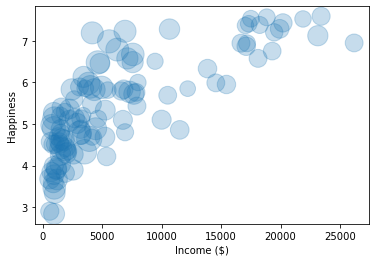

In [71]:
import matplotlib.pyplot as plt    #standard import of plotting library

ineq = data['income_inequality']

plt.xlabel('Income ($)')
plt.ylabel('Happiness')

plt.scatter(income, happy, s=ineq*10, alpha=0.25) #3 variables, size of discs indicates inequality 

In [25]:
data  #data returned through panda library, a bit more sophisticated than numpy arrays

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [30]:
data.sort_values('avg_income')  #returns sorted values
data.sort_values('avg_income', inplace = True)   #sorts the data in the DataFrame, the orginal data itself will be affected 

data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
16,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


## Filtering Data

In [34]:
richest = data[data["avg_income"] > 15000]   #filtered data, to present only the richest countries based on avg income

richest

country                        Luxembourg
adjusted_satisfaction                  66
avg_satisfaction                      7.7
std_satisfaction                     1.76
avg_income                        26182.3
median_income                     22240.2
income_inequality                   31.95
region                   'Western Europe'
happyScore                          6.946
GDP                               1.56391
country.1                      Luxembourg
Name: 61, dtype: object

In [35]:
richest.iloc[0] #pulling the first row, in our case will be the one with the lowest income -Italy

country                             Italy
adjusted_satisfaction                  57
avg_satisfaction                      6.6
std_satisfaction                     1.81
avg_income                        15437.6
median_income                     13163.1
income_inequality                 34.1262
region                   'Western Europe'
happyScore                          5.948
GDP                               1.25114
country.1                           Italy
Name: 49, dtype: object

In [36]:
richest.iloc[-1] #pulling out the last row, with the highest income - Luxembourg

country                        Luxembourg
adjusted_satisfaction                  66
avg_satisfaction                      7.7
std_satisfaction                     1.76
avg_income                        26182.3
median_income                     22240.2
income_inequality                   31.95
region                   'Western Europe'
happyScore                          6.946
GDP                               1.56391
country.1                      Luxembourg
Name: 61, dtype: object

In [38]:
richest.iloc[0:5] #first 5 rows

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595,13163.070,34.12625,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770,13823.160,32.41875,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755,15166.605,26.95000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550,14172.735,34.43250,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505,15166.455,28.74500,'Western Europe',6.937,1.30782,Belgium


In [43]:
import numpy as np

print(np.mean(richest['avg_income'])) #avg income of the richest set above 150 000 avg mean

print(np.mean(data['avg_income'])) #avg income of all data set

19266.680753968256
6442.751416214639


## Adding labels to the data points on the graph

Text(26182.275, 6.9460000000000015, 'Luxembourg')

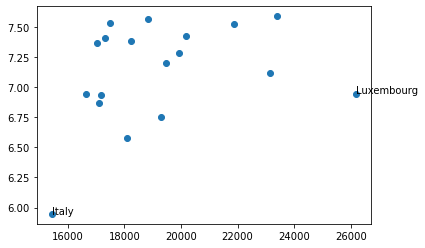

In [53]:
plt.scatter(richest['avg_income'],richest['happyScore'])

#3 argumenst needed for labelling - x position, y position, text/label name 

#if we want to present the first data point in our graph, we have:
plt.text(richest.iloc[0]['avg_income'],
         richest.iloc[0]['happyScore'],
         richest.iloc[0]['country'])  #the label is the name of the country

plt.text(richest.iloc[-1]['avg_income'],
         richest.iloc[-1]['happyScore'],
         richest.iloc[-1]['country'])

## Presenting all the points on a graph - for & iterrows

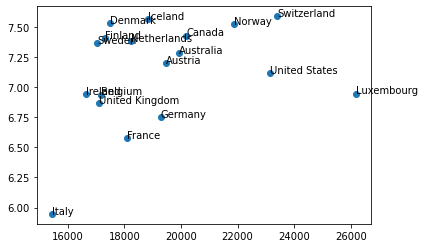

In [65]:
#Presents all the rows (similar to list comprehension) - generates an iterator

plt.scatter(richest['avg_income'],richest['happyScore'])

for k, row in richest.iterrows():
    plt.text(row['avg_income'],
             row['happyScore'],
             row['country'])
    

## Using K-means to Interpret the Data

How can we group the data together? We can use the Kmeans function.

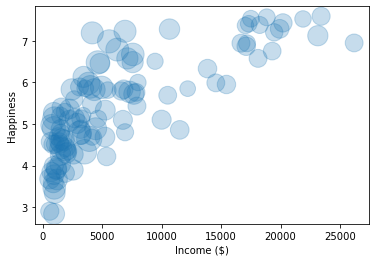

In [72]:
plt.xlabel('Income ($)')
plt.ylabel('Happiness')

plt.scatter(income, happy, s=ineq*10, alpha=0.25) #3 variables, size of discs indicates inequality 

In [80]:
from sklearn.cluster import KMeans #import K means, clustering
import numpy as np

'''
unlike scatter that has requires a 2D array (2 var), Kmeans requires a different structure 
for which we'll use numpy column stack function
'''
income_happy = np.column_stack((income, happy))

'''
Use Kmeans function by defining the number of clusters and calling in the fit 
function to process and the data of income_happy onto the clusters created
'''

km_res = KMeans(n_clusters=3).fit(income_happy)

In [95]:
clusters = km_res.cluster_centers_  #3 clusters below, under (X,Y) format, each line representing a point on the graph 
print(clusters)

#OBS: 1st column = income score, 2nd column = happy score
#[7.57755711e+03, 5.85080769e+00] - high income and high happiness score - top right corner 
#[2.19912121e+03, 4.75472308e+00] - middle income and middle happiness score - middle of the graph
#[1.87593022e+04, 7.03270000e+00] - low in income and low in happiness score - bottom left corner

[[7.57755711e+03 5.85080769e+00]
 [1.87593022e+04 7.03270000e+00]
 [2.19912121e+03 4.75472308e+00]]


__Now let's map the cluster points on the graph__

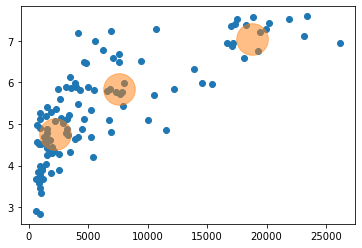

In [101]:
plt.scatter(income, happy)
plt.scatter(clusters[:,0],clusters[:,1], s = 1000, alpha = 0.50) 

#next step - find the std deviation, and create an ellipse around the cluster centers